# Imports

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load and process the data

In [25]:
data_path_1 = "data/prices_round_1_day_-2.csv"
data_path_2 = "data/prices_round_1_day_-1.csv"
data_path_3 = "data/prices_round_1_day_0.csv"

data_paths = [data_path_1, data_path_2, data_path_3]

# read the data and concatenate them
all_data = pd.concat([pd.read_csv(data_path, sep=";") for data_path in data_paths])
all_data["timestamp"] = all_data["timestamp"]//100
all_data["timestamp"] = all_data["timestamp"] + (all_data["day"]+2)*10000

products = all_data["product"].unique()
data_by_product = {}
for product in products:
    data_by_product[product] = all_data[all_data["product"] == product]
    data_by_product[product].set_index("timestamp", inplace=True)
    data_by_product[product] = data_by_product[product].drop(columns=["day"])
    data_by_product[product].sort_index(inplace=True)

# Helper functions

In [59]:
def plot_product(product, values, start_timestamp, length):
    plt.figure(figsize=(20, 10))
    for value in values:
        plt.plot(data_by_product[product].loc[start_timestamp:start_timestamp + length, value], label=value, linewidth=0.5)
    plt.legend()
    plt.title(product)
    plt.xlabel("timestamp")
    plt.ylabel("value")
    plt.show()

def plot_sample(product, values, start_timestamp, length, sample_freq):
    # sample_freq is the number of timestamps between each sample
    plt.figure(figsize=(20, 10))
    for value in values:
        plt.plot(data_by_product[product].loc[start_timestamp:start_timestamp + length:sample_freq, value], label=value, linewidth=0.5)
    plt.legend()
    plt.title(product)
    plt.xlabel("timestamp")
    plt.ylabel("value")
    plt.show()

# Starfruit linear regression

In [56]:
data_by_product["STARFRUIT"]

,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,
0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
1,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
2,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0
3,STARFRUIT,4996,27,NaN,NaN,NaN,NaN,5003,27,NaN,NaN,NaN,NaN,4999.5,0.0
4,STARFRUIT,4995,20,NaN,NaN,NaN,NaN,5002,20,NaN,NaN,NaN,NaN,4998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,STARFRUIT,5049,28,NaN,NaN,NaN,NaN,5056,28,NaN,NaN,NaN,NaN,5052.5,0.0
29996,STARFRUIT,5048,9,5047.0,27.0,NaN,NaN,5054,29,NaN,NaN,NaN,NaN,5051.0,0.0
29997,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0


In [82]:
starfruit_mids = data_by_product["STARFRUIT"][["mid_price"]]
for i in range(1, 100):
    starfruit_mids[f"mid_price_-{i}"] = starfruit_mids["mid_price"].shift(-i)
# drop rows with NaN values
starfruit_mids = starfruit_mids.dropna()
starfruit_mids

/var/folders/tz/8d30brvn0slf42llhx754g6r0000gn/T/ipykernel_54366/2123683049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starfruit_mids[f"mid_price_-{i}"] = starfruit_mids["mid_price"].shift(-i)
/var/folders/tz/8d30brvn0slf42llhx754g6r0000gn/T/ipykernel_54366/2123683049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starfruit_mids[f"mid_price_-{i}"] = starfruit_mids["mid_price"].shift(-i)
/var/folders/tz/8d30brvn0slf42llhx754g6r0000gn/T/ipykernel_54366/2123683049.py:3: SettingWithCopyWarning: 
A

,mid_price,mid_price_-1,mid_price_-2,mid_price_-3,mid_price_-4,mid_price_-5,mid_price_-6,mid_price_-7,mid_price_-8,mid_price_-9,...,mid_price_-90,mid_price_-91,mid_price_-92,mid_price_-93,mid_price_-94,mid_price_-95,mid_price_-96,mid_price_-97,mid_price_-98,mid_price_-99
timestamp,,,,,,,,,,,,,,,,,,,,,
0,5000.0,5002.0,5000.0,4999.5,4998.5,5002.0,4999.5,5000.0,5002.5,5002.5,...,4999.5,5001.5,5000.5,5002.5,4999.5,5001.0,5002.0,5000.5,5000.5,4999.0
1,5002.0,5000.0,4999.5,4998.5,5002.0,4999.5,5000.0,5002.5,5002.5,4999.0,...,5001.5,5000.5,5002.5,4999.5,5001.0,5002.0,5000.5,5000.5,4999.0,4999.5
2,5000.0,4999.5,4998.5,5002.0,4999.5,5000.0,5002.5,5002.5,4999.0,4999.5,...,5000.5,5002.5,4999.5,5001.0,5002.0,5000.5,5000.5,4999.0,4999.5,5000.0
3,4999.5,4998.5,5002.0,4999.5,5000.0,5002.5,5002.5,4999.0,4999.5,5000.0,...,5002.5,4999.5,5001.0,5002.0,5000.5,5000.5,4999.0,4999.5,5000.0,4999.0
4,4998.5,5002.0,4999.5,5000.0,5002.5,5002.5,4999.0,4999.5,5000.0,5002.0,...,4999.5,5001.0,5002.0,5000.5,5000.5,4999.0,4999.5,5000.0,4999.0,5002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29896,5052.5,5052.5,5052.5,5052.5,5051.5,5052.5,5053.0,5052.5,5054.0,5052.5,...,5053.5,5052.5,5053.5,5053.0,5053.0,5052.0,5051.5,5052.0,5051.5,5052.5
29897,5052.5,5052.5,5052.5,5051.5,5052.5,5053.0,5052.5,5054.0,5052.5,5054.0,...,5052.5,5053.5,5053.0,5053.0,5052.0,5051.5,5052.0,5051.5,5052.5,5051.0
29898,5052.5,5052.5,5051.5,5052.5,5053.0,5052.5,5054.0,5052.5,5054.0,5055.0,...,5053.5,5053.0,5053.0,5052.0,5051.5,5052.0,5051.5,5052.5,5051.0,5053.5


In [89]:
def starfruit_lagged_linreg(n):
    X = starfruit_mids[[f"mid_price_-{i}" for i in range(1, n+1)]]
    y = starfruit_mids["mid_price"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Coefficients: ", model.coef_)
    print("Intercept: ", model.intercept_)
    print("Mean squared error: ", mean_squared_error(y_test, y_pred))

In [92]:
for i in range(1, 12):
    print(f"n = {i}")
    starfruit_lagged_linreg(i)

n = 1
Coefficients:  [0.99860598]
Intercept:  7.0176317292443855
Mean squared error:  2.9324446449244914
n = 2
Coefficients:  [0.53343686 0.46579458]
Intercept:  3.8665975107178383
Mean squared error:  2.2374836858312577
n = 3
Coefficients:  [0.39956423 0.31763828 0.28230481]
Intercept:  2.4762471872127207
Mean squared error:  2.0559056843347414
n = 4
Coefficients:  [0.34540765 0.25702112 0.20602825 0.19118522]
Intercept:  1.7968111004138336
Mean squared error:  1.9899993645025458
n = 5
Coefficients:  [0.31806246 0.22656314 0.16835354 0.14077516 0.14597395]
Intercept:  1.3627617225110953
Mean squared error:  1.9622751325337136
n = 6
Coefficients:  [0.30461339 0.21335784 0.15240904 0.11842418 0.11537742 0.09555807]
Intercept:  1.3036366706337503
Mean squared error:  1.944736598927217
n = 7
Coefficients:  [0.29826033 0.20618452 0.1450607  0.10836582 0.10099495 0.07575541
 0.06513164]
Intercept:  1.2356395846982196
Mean squared error:  1.9408050296497643
n = 8
Coefficients:  [0.29645924 0

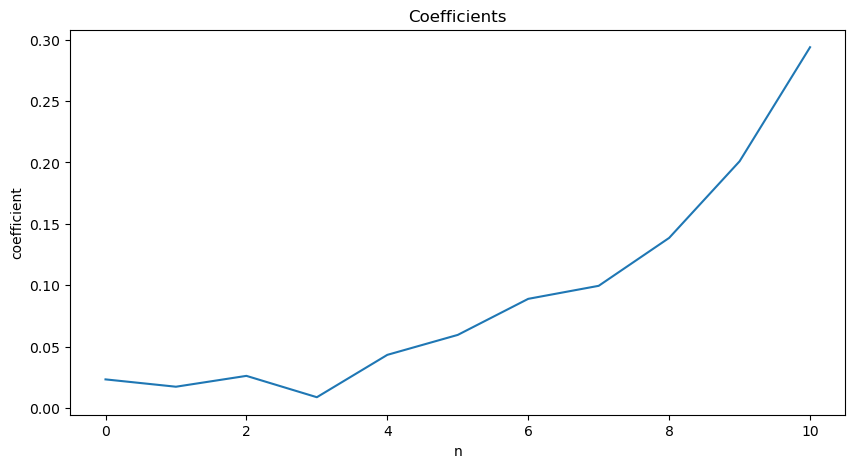

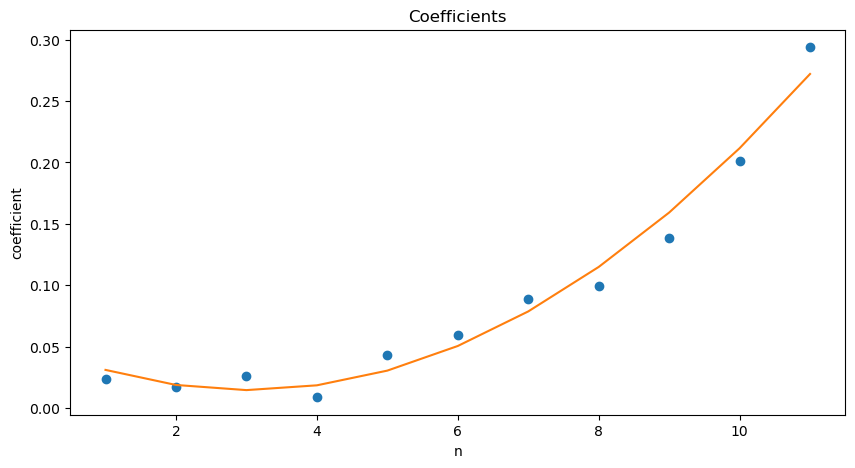

In [114]:
a = [0.29387402, 0.20094161, 0.13851799, 0.09948268, 0.08887291, 0.05949368, 0.04323862, 0.00872256, 0.02612025, 0.01727864, 0.02325454]
a = a[::-1]
# plot the coefficients
plt.figure(figsize=(10, 5))
plt.plot(a)
plt.xlabel("n")
plt.ylabel("coefficient")
plt.title("Coefficients")
plt.show()

# fit a quadratic model to a
x = np.arange(1, 12)
y = a
model = np.poly1d(np.polyfit(x, y, 2))
plt.figure(figsize=(10, 5))
plt.plot(x, y, "o")
plt.plot(x, model(x))
plt.xlabel("n")
plt.ylabel("coefficient")
plt.title("Coefficients")
plt.show()

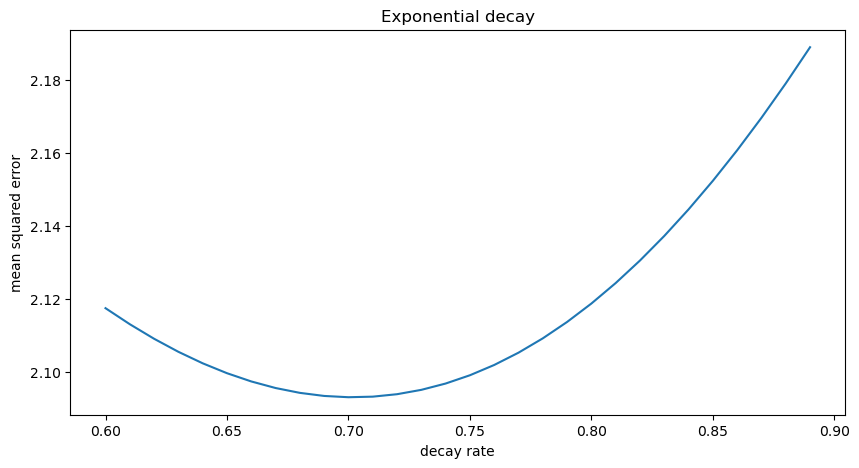

Best decay rate: 0.7
Mean squared error: 2.0931241572326096


In [111]:
def test_exponential_decay(exponent):
    X = sum([starfruit_mids[f"mid_price_-{i+1}"] * (exponent**i) for i in range(1, 11)])
    X = X.values.reshape(-1, 1)
    y = starfruit_mids["mid_price"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

# allow only exponentially decaying coefficients
decay_rates = [i/100 for i in range(60, 90)]
errors = [test_exponential_decay(decay_rate) for decay_rate in decay_rates]

plt.figure(figsize=(10, 5))
plt.plot(decay_rates, errors)
plt.xlabel("decay rate")
plt.ylabel("mean squared error")
plt.title("Exponential decay")
plt.show()

best_decay_rate = decay_rates[np.argmin(errors)]
print(f"Best decay rate: {best_decay_rate}")
print(f"Mean squared error: {errors[np.argmin(errors)]}")

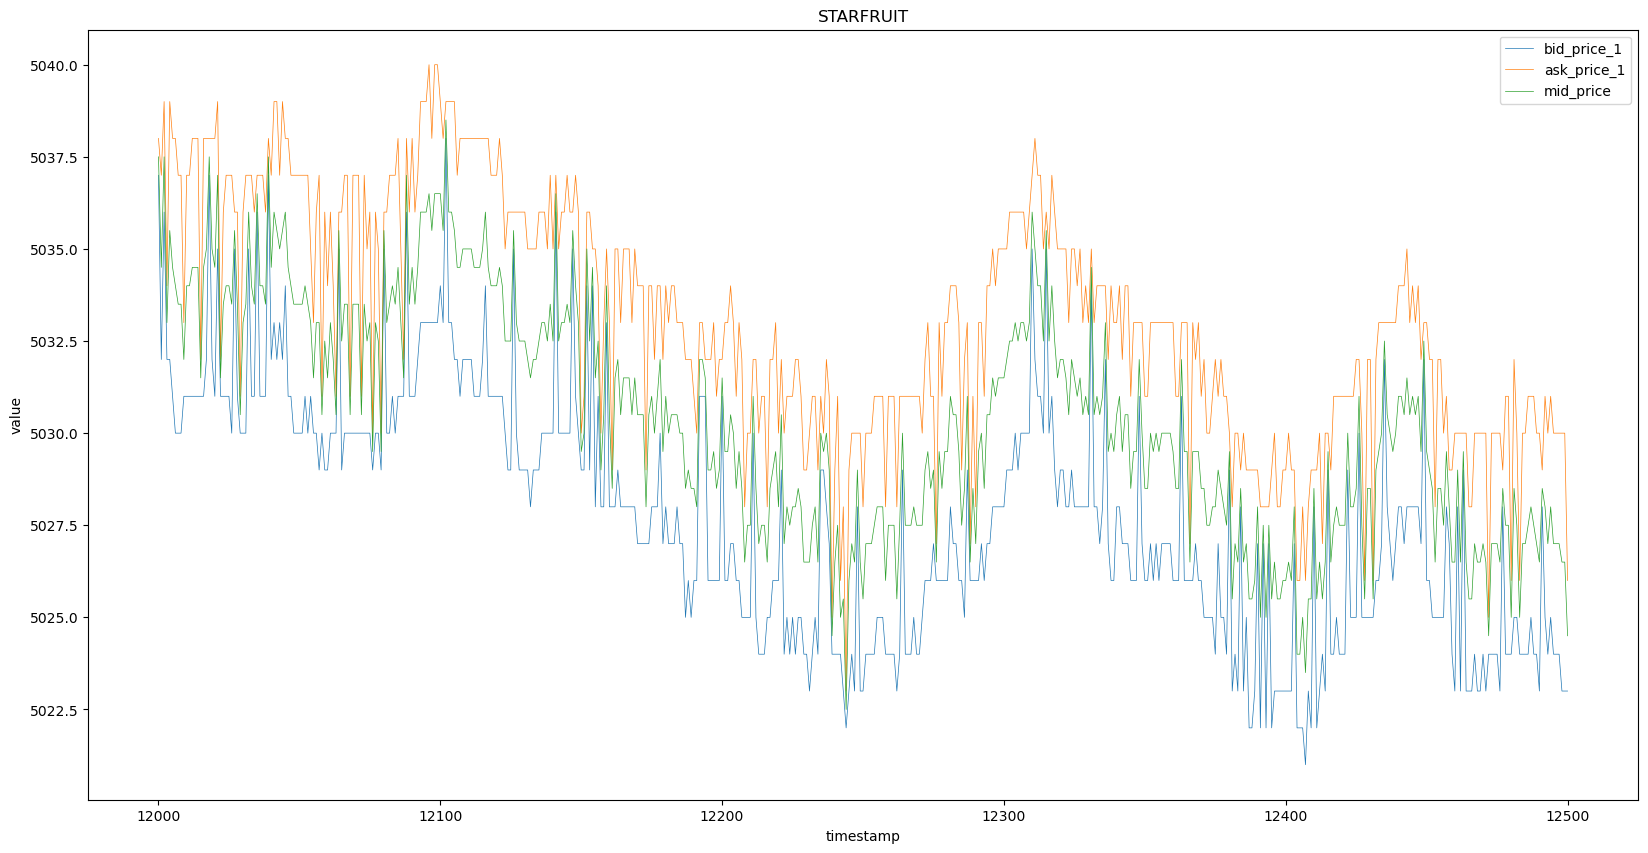

In [58]:
plot_product("STARFRUIT", ["bid_price_1", "ask_price_1", "mid_price"], 12000, 500)

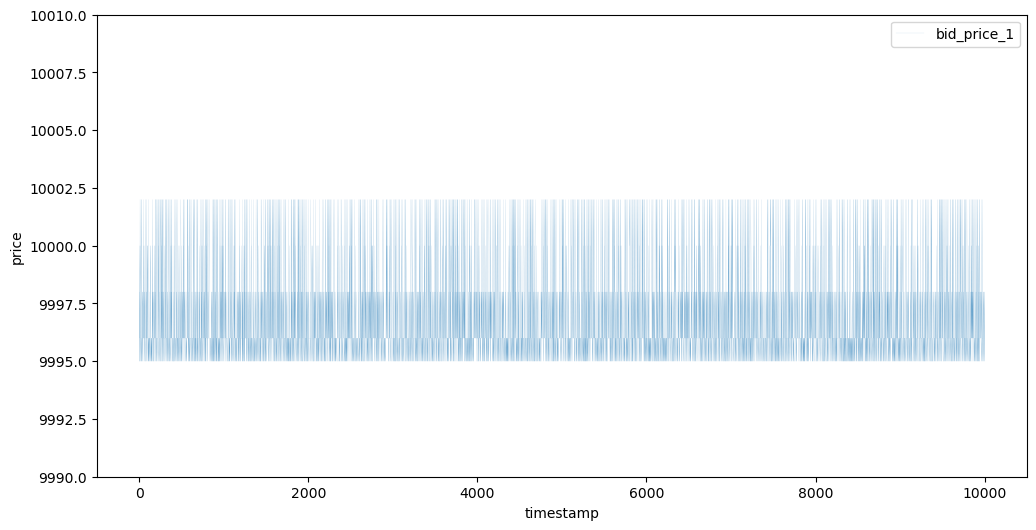

In [42]:
# plot the bid_price_1 and ask_price_1 for Amethysts in an interactive plot
start_timestamp = 0
end_timestamp = 10000

# plot only from start_timestamp to end_timestamp
plt.figure(figsize=(12, 6))
plt.plot(data_by_product["AMETHYSTS"]["bid_price_1"].iloc[start_timestamp:end_timestamp], label="bid_price_1", linewidth=0.05)
#plt.plot(data_by_product["AMETHYSTS"]["ask_price_1"], label="ask_price_1")
plt.ylim(9990, 10010)
plt.xlabel("timestamp")
plt.ylabel("price")
plt.legend()
plt.show()